In [417]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [418]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from matplotlib import pyplot as plt
import seaborn as sns

In [419]:
#Reading all the Dataframes and storig them into respective Variable Names.

cars_trucks_buses = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\cars_trucks_and_buses_per_1000_persons.csv')
co2_emissions = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\co2_emissions_tonnes_per_person.csv')
coal_consumption = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\coal_consumption_per_cap.csv')
elec_gen = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\electricity_generation_per_person.csv')
elec_use = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\electricity_use_per_person.csv')
forest_coverage = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\forest_coverage_percent.csv')
hydro_power_gen = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\hydro_power_generation_per_person.csv')
income_pp = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
industry_gdp = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\industry_percent_of_gdp.csv')
natgas_prod = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\natural_gas_production_per_person.csv')
oil_consum = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\oil_consumption_per_cap.csv')
oil_prod = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\oil_production_per_person.csv')
yearly_co2_emission = pd.read_csv('.\\co2_prediction dataset\\co2_prediction\\yearly_co2_emissions_1000_tonnes.csv')

In [420]:
#Defining a Dictionary for all the Dataframes, as it will be easy to access them when they will be used to combine into one
#Main Dataframe

columns = {'cars_trucks_buses' : cars_trucks_buses , 
             'co2_emissions' : co2_emissions, 
             'coal_consumption' : coal_consumption, 
             'elec_gen' : elec_gen, 
             'elec_use' : elec_use, 
             'forest_coverage' : forest_coverage, 
             'hydro_power_gen' : hydro_power_gen, 
             'income_pp' : income_pp,
             'industry_gdp' : industry_gdp,
             'natgas_prod' : natgas_prod,
             'oil_consum' : oil_consum,
             'oil_prod' : oil_prod,
             'yearly_co2_emission' : yearly_co2_emission
          }

In [421]:
#Printing the shape of every Dataframe to check which one has the highest number of row count,
#in other words, having data of max number of countries.

for i in columns.keys():
    print(i , ' = ' , columns.get(i).shape)

cars_trucks_buses  =  (157, 7)
co2_emissions  =  (192, 216)
coal_consumption  =  (65, 53)
elec_gen  =  (65, 33)
elec_use  =  (138, 56)
forest_coverage  =  (192, 27)
hydro_power_gen  =  (118, 53)
income_pp  =  (193, 220)
industry_gdp  =  (189, 59)
natgas_prod  =  (49, 48)
oil_consum  =  (65, 53)
oil_prod  =  (49, 53)
yearly_co2_emission  =  (192, 265)


* income_pp has the highest number of rows implying that it contains data of almost all the countries.

In [422]:
#Creating the main DataFrame 'df' and inserting the first column as 'country' of the Series "income_pp['geo']"
df = pd.DataFrame(columns.get('income_pp')['geo'])

for i in columns.keys() :
    if '2014' in columns.get(i).columns :
        df =pd.merge(df , columns.get(i)[['geo','2014']] , how='outer' , on='geo')
    else:
        print(i)

cars_trucks_buses
hydro_power_gen


In [423]:
new_columns = ['country']
new_columns.extend(list(columns.keys()))
new_columns.remove('cars_trucks_buses')
new_columns.remove('hydro_power_gen')
df.columns = new_columns

In [424]:
df['country'].is_unique

True

In [425]:
df.tail()

,country,co2_emissions,coal_consumption,elec_gen,elec_use,forest_coverage,income_pp,industry_gdp,natgas_prod,oil_consum,oil_prod,yearly_co2_emission
189,Vietnam,1.800,0.205,1540.0,1410.0,47.20,5370.0,33.2,0.0993,0.195,0.195,167000.0
190,Yemen,0.865,NaN,NaN,216.0,1.04,3770.0,44.0,0.3200,NaN,0.256,22700.0
191,Zambia,0.288,NaN,NaN,707.0,65.70,3630.0,32.9,NaN,NaN,NaN,4500.0
192,Zimbabwe,0.780,NaN,NaN,537.0,37.20,1910.0,22.5,NaN,NaN,NaN,12000.0
193,Liechtenstein,1.190,NaN,NaN,NaN,43.10,NaN,39.6,NaN,NaN,NaN,44.0


In [426]:
df = df.sort_values('country')
df = df.reset_index(drop=True)

In [427]:
df.tail()

,country,co2_emissions,coal_consumption,elec_gen,elec_use,forest_coverage,income_pp,industry_gdp,natgas_prod,oil_consum,oil_prod,yearly_co2_emission
189,Venezuela,6.030,0.00641,3590.0,2660.0,53.10,16700.0,37.2,0.8390,1.090,4.510,185000.0
190,Vietnam,1.800,0.20500,1540.0,1410.0,47.20,5370.0,33.2,0.0993,0.195,0.195,167000.0
191,Yemen,0.865,NaN,NaN,216.0,1.04,3770.0,44.0,0.3200,NaN,0.256,22700.0
192,Zambia,0.288,NaN,NaN,707.0,65.70,3630.0,32.9,NaN,NaN,NaN,4500.0
193,Zimbabwe,0.780,NaN,NaN,537.0,37.20,1910.0,22.5,NaN,NaN,NaN,12000.0


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 12 columns):
country                194 non-null object
co2_emissions          192 non-null float64
coal_consumption       65 non-null float64
elec_gen               65 non-null float64
elec_use               137 non-null float64
forest_coverage        191 non-null float64
income_pp              193 non-null float64
industry_gdp           183 non-null float64
natgas_prod            49 non-null float64
oil_consum             65 non-null float64
oil_prod               49 non-null float64
yearly_co2_emission    192 non-null float64
dtypes: float64(11), object(1)
memory usage: 18.3+ KB


In [429]:
df.describe()

,co2_emissions,coal_consumption,elec_gen,elec_use,forest_coverage,income_pp,industry_gdp,natgas_prod,oil_consum,oil_prod,yearly_co2_emission
count,192.000000,65.00000,65.000000,137.000000,191.000000,193.000000,183.000000,49.000000,65.000000,49.000000,1.920000e+02
mean,4.440085,0.44212,6188.215385,4253.621898,31.907068,17210.398964,26.761093,4.421976,1.410500,4.747659,1.759925e+05
std,6.065368,0.53450,5046.927099,6024.002485,23.783266,18911.747174,13.365268,10.830251,1.756355,8.236582,8.607430e+05
min,0.044500,0.00000,350.000000,39.000000,0.000000,602.000000,2.530000,0.021200,0.036100,0.032200,1.100000e+01
25%,0.659000,0.04000,2890.000000,812.000000,11.000000,3270.000000,18.600000,0.230000,0.495000,0.301000,2.190000e+03
50%,2.265000,0.25000,4750.000000,2580.000000,32.000000,10800.000000,24.700000,0.742000,1.060000,1.440000,1.130000e+04
75%,5.695000,0.59400,8110.000000,5360.000000,47.650000,24000.000000,31.400000,2.990000,1.490000,4.510000,6.377500e+04
max,45.400000,2.34000,27600.000000,53800.000000,98.300000,121000.000000,70.500000,66.000000,12.100000,39.700000,1.030000e+07


In [430]:
#Checking for duplicacy in the DataFrame using '.duplicated()' method and then checking the number of rows using
# '.shape[0]'
print("Number of Duplicate Rows in DataFrame:" , df[df.duplicated()].shape[0])

Number of Duplicate Rows in DataFrame: 0


In [431]:
#Checking the Percentage of Columns having Missing Values in both the DataFrames
print('-+-'*10)
print(round(df.isnull().sum()/len(df)*100,2))
print('-+-'*10)

-+--+--+--+--+--+--+--+--+--+-
country                 0.00
co2_emissions           1.03
coal_consumption       66.49
elec_gen               66.49
elec_use               29.38
forest_coverage         1.55
income_pp               0.52
industry_gdp            5.67
natgas_prod            74.74
oil_consum             66.49
oil_prod               74.74
yearly_co2_emission     1.03
dtype: float64
-+--+--+--+--+--+--+--+--+--+-


In [432]:
# sns.pairplot(df)
# plt.show()

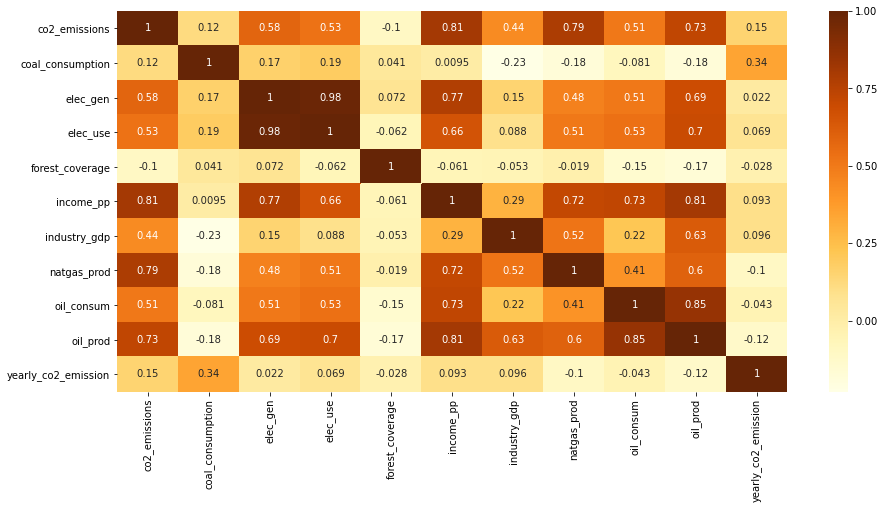

In [433]:
fig, axs = plt.subplots(figsize = (15,7))
sns.heatmap(df.corr(),cmap='YlOrBr',annot=True)
plt.show()

Correlation of `co2_emmisions` with independent variables:
* `co2_emmisions` is highly correlated to `income_pp` , `natgas_prod` , `oil_prod`

Correlation among independent variables:
* `elec_gen` and `elec_use` are highly correlated, depicts that the electricity generated and electricity used are quite dependent on each other. (`elec_gen` has more correlation with `co2_emissions` than `elec_use`)
* `oil_consum` and `oil_prod` are highy correlated, depicts that the oil consumed and oil produced are also quite dependent on each other.

In [434]:
#Defining a function 'scatterPlot()' which can be used for plotting the scatter-plots for all columns v/s 'TARGET_deathRate'
#(dependent Variable) of the Dataframe passed as an argument

def scatterPlot(df,rows,cols,Title):
    # 'n' will store the number of Columns
    n = df.shape[1]
    
    #Creating subplots
    fig, axs = plt.subplots(rows,cols, figsize = (15, 15))
    
    #Defining the color schemes
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'pink','k'] # to set color
    
    #Looping through the DataFrame and plotting for each Column
    k=0
    j=0
    for i, var in enumerate(df.columns.values):
        if (j%cols==0 and j!=0):
            k+=1
        if (j%8==0 and j!=0):
            j=0
        
        axs[k, i-int(k*cols)].scatter(df[var], df["co2_emissions"], color = colors[j])
        axs[k, i-int(k*cols)].set_xlabel(var, fontsize = 'large')
        j+=1
    
    #Providing Tiltle for the Plot 
    plt.suptitle(Title, fontsize = 'xx-large',y=0.92)
    plt.show()

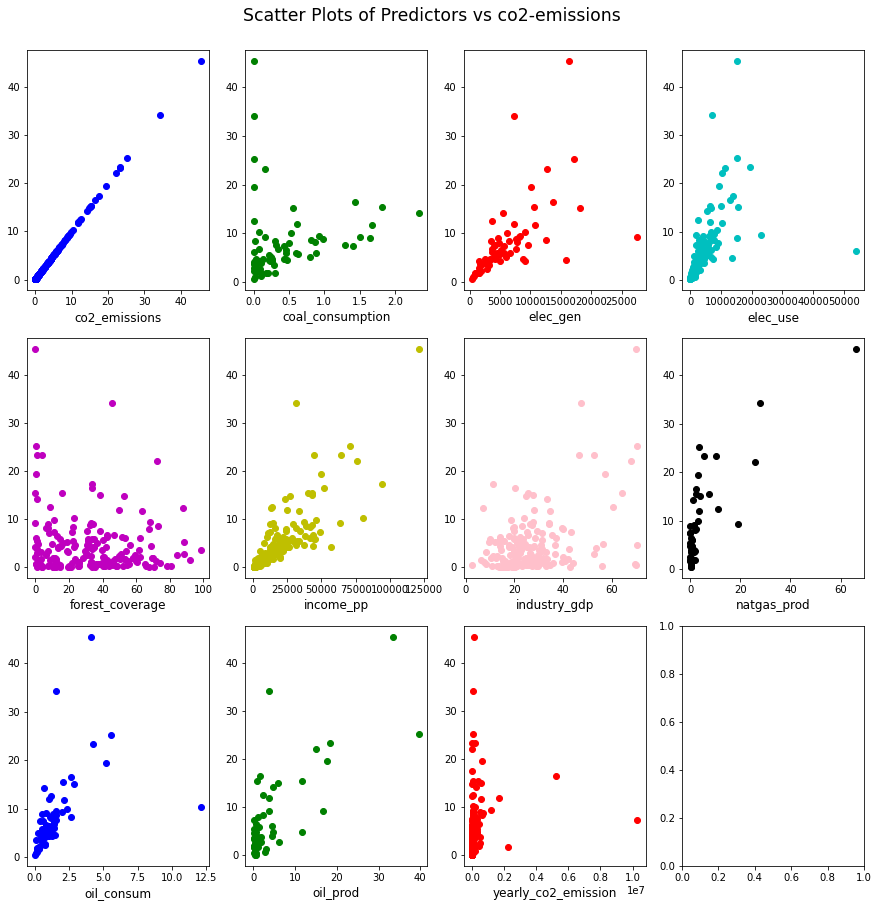

In [435]:
#Plotting Scatter Plots v/s 'TARGET_deathRate' (dependent Variable)
scatterPlot(df.drop(columns = ['country'],axis=1),3,4,'Scatter Plots of Predictors vs co2-emissions')

In [436]:
df.drop(columns=['coal_consumption','elec_gen','oil_consum'],axis=1,inplace=True)

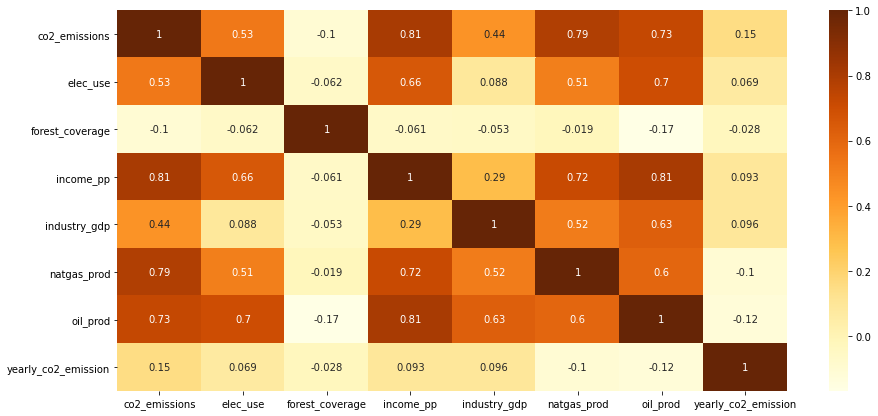

In [437]:
fig, axs = plt.subplots(figsize = (15,7))
sns.heatmap(df.corr(),cmap='YlOrBr',annot=True)
plt.show()

In [438]:
df.drop(columns=['natgas_prod', 'oil_prod'],axis=1,inplace=True)

In [439]:
df.drop(columns=['country'],axis=1,inplace=True)

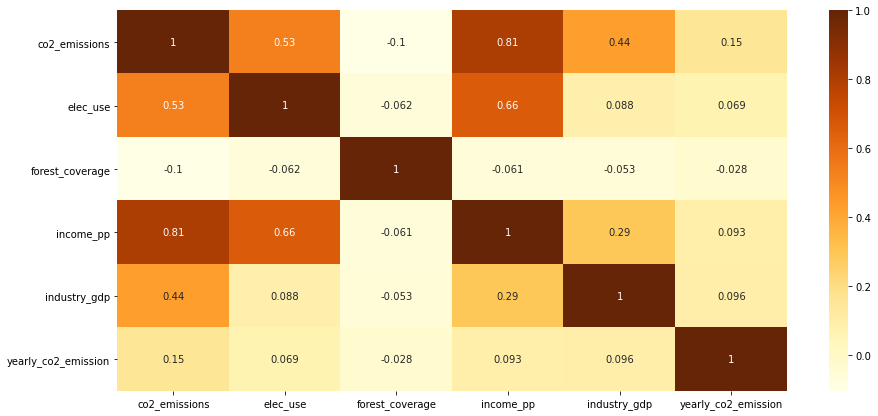

In [440]:
fig, axs = plt.subplots(figsize = (15,7))
sns.heatmap(df.corr(),cmap='YlOrBr',annot=True)
plt.show()

In [441]:
df = df[df['co2_emissions'].notna()]
df = df[df['forest_coverage'].notna()]
df = df[df['income_pp'].notna()]
df = df[df['yearly_co2_emission'].notna()]

In [442]:
df['elec_use'] = df['elec_use'].fillna(df['elec_use'].median())
df['industry_gdp'] = df['industry_gdp'].fillna(df['industry_gdp'].median())

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 193
Data columns (total 6 columns):
co2_emissions          189 non-null float64
elec_use               189 non-null float64
forest_coverage        189 non-null float64
income_pp              189 non-null float64
industry_gdp           189 non-null float64
yearly_co2_emission    189 non-null float64
dtypes: float64(6)
memory usage: 10.3 KB


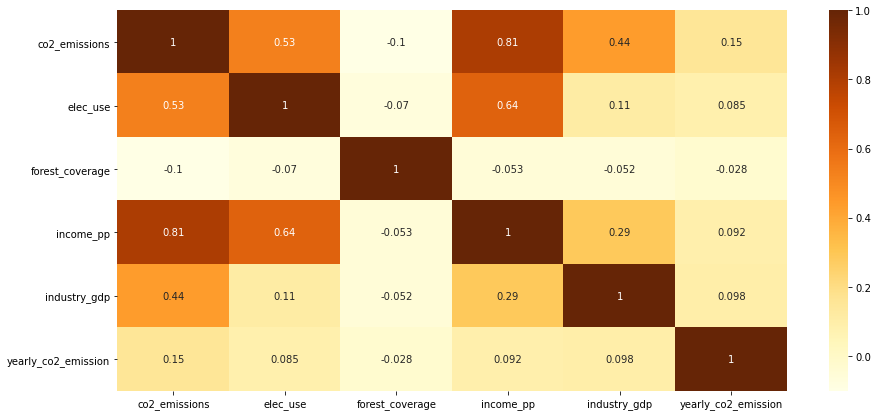

In [444]:
fig, axs = plt.subplots(figsize = (15,7))
sns.heatmap(df.corr(),cmap='YlOrBr',annot=True)
plt.show()

In [445]:
#Defining a function 'distributionPlot()' which can be used for plotting the distribution plots for all columns of the Dataframe
#passed as an argument

def distributionPlot(df,rows,cols,Title):
    # 'n' will store the number of Columns
    n = df.shape[1]
    
    #Creating subplots
    fig, axs = plt.subplots(rows,cols, figsize = (15, 8))
    fig.subplots_adjust(top=0.8)
    
    #Defining the color schemes
    colors = ['#3E37FF', '#3BFF00', '#FF6050', '#00FFEA', '#BA00FF', '#FFFE00', '#FF36DD','orange'] # to set color
    
    #Looping through the DataFrame and plotting for each Column
    k=0
    j=0
    for i, var in enumerate(df.columns.values):
        
        if (j%cols==0 and j!=0):
            k+=1
        if (j%8==0 and j!=0):
            j=0
    
        sns.distplot(df[var],ax=axs[k, i-int(k*cols)],color=colors[j],kde_kws=dict(linewidth=cols),hist=True)
        axs[k, i-int(k*cols)].set_xlabel(var, fontsize = 'large')
        j+=1
    
    #Providing Tiltle for the Plot    
    plt.suptitle(Title, fontsize = 'xx-large',y=0.85)
    plt.show()

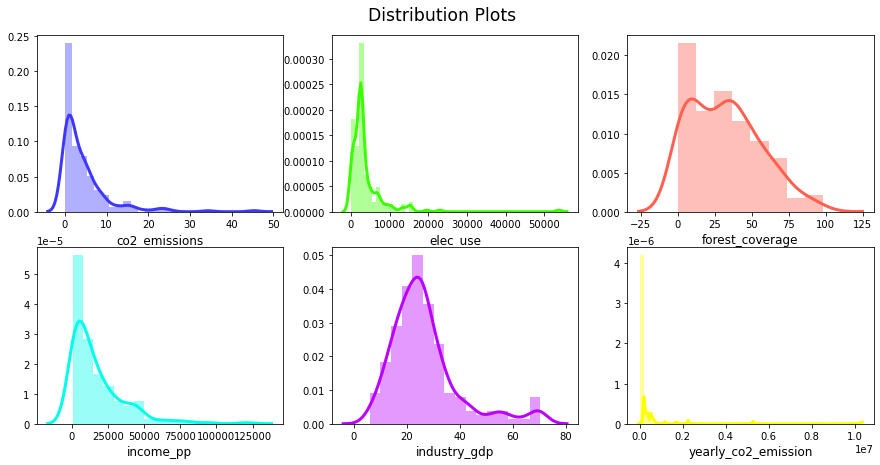

In [447]:
distributionPlot(df ,rows = 2,cols = 3,Title = "Distribution Plots")

In [448]:
#Defining a function 'boxPlot()' which can be used for plotting the box-plots for all columns of the Dataframe passed as
#an argument
def boxPlot(df,rows,cols,Title):
    # 'n' will store the number of Columns
    n = df.shape[1]
    
    #Creating subplots
    fig, axs = plt.subplots(rows,cols, figsize = (15, 10))
    
    #Defining the color schemes
    colors = ['#3E37FF', '#3BFF00', '#FF6050', '#00FFEA', '#BA00FF', '#FFFE00', '#FF36DD','orange'] # to set color
    
    #Looping through the DataFrame and plotting for each Column
    k=0
    j=0
    for i, var in enumerate(df.columns.values):
        if (j%cols==0 and j!=0):
            k+=1
        if (j%8==0 and j!=0):
            j=0
    
        sns.boxplot(data = df[var] , ax = axs[k, i-int(k*cols)], color= colors[j],linewidth=2)
        axs[k, i-int(k*cols)].set_xlabel(var, fontsize = 'large')
        j+=1
    
    #Providing Tiltle for the Plot 
    plt.suptitle(Title, fontsize = 'xx-large',y=0.91)
    plt.show()

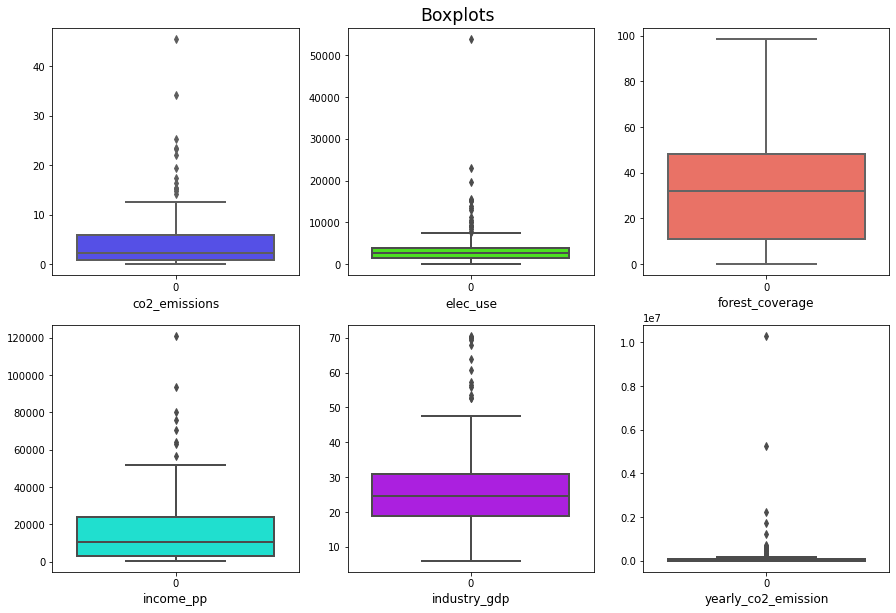

In [449]:
#Plotting Boxplots Plots
boxPlot(df ,rows = 2,cols = 3,Title = "Boxplots")

In [450]:
for x in df.columns:
    print("Capping The",x)
    ten = df[x].quantile(0.10)
    nin = df[x].quantile(0.90)
    df[x] = np.where(df[x] < ten, ten,df[x])
    df[x] = np.where(df[x] > nin, nin,df[x])

Capping The co2_emissions
Capping The elec_use
Capping The forest_coverage
Capping The income_pp
Capping The industry_gdp
Capping The yearly_co2_emission


In [451]:
'''
#Bringing the values of Outliers between 0.01 and 0.99 Quantile
#This may add a little Bias to the Dataset but it's better than dropping the rows containing Outliers as,
#Almost 2/3rd of the rows are dropped if we drop the Rows containing  Outliers.
#Hence Capping is more feasible in this case
for col in df.columns:
    print("Capping The",col)
    
    #The values less than 0.01 Quantile are brought to 0.01 Quantile and
    #The values greater than 0.99 Quantile are brought to 0.99 Quantile.
    if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
        percentiles = df[col].quantile([0.1,0.9]).values
        df[col][df[col] <= percentiles[0]] = percentiles[0]
        df[col][df[col] >= percentiles[1]] = percentiles[1]
    
    #In case of Categorical Variables
    else:
        df[col]=df[col]
'''

'\n#Bringing the values of Outliers between 0.01 and 0.99 Quantile\n#This may add a little Bias to the Dataset but it\'s better than dropping the rows containing Outliers as,\n#Almost 2/3rd of the rows are dropped if we drop the Rows containing  Outliers.\n#Hence Capping is more feasible in this case\nfor col in df.columns:\n    print("Capping The",col)\n    \n    #The values less than 0.01 Quantile are brought to 0.01 Quantile and\n    #The values greater than 0.99 Quantile are brought to 0.99 Quantile.\n    if (((df[col].dtype)==\'float64\') | ((df[col].dtype)==\'int64\')):\n        percentiles = df[col].quantile([0.1,0.9]).values\n        df[col][df[col] <= percentiles[0]] = percentiles[0]\n        df[col][df[col] >= percentiles[1]] = percentiles[1]\n    \n    #In case of Categorical Variables\n    else:\n        df[col]=df[col]\n'

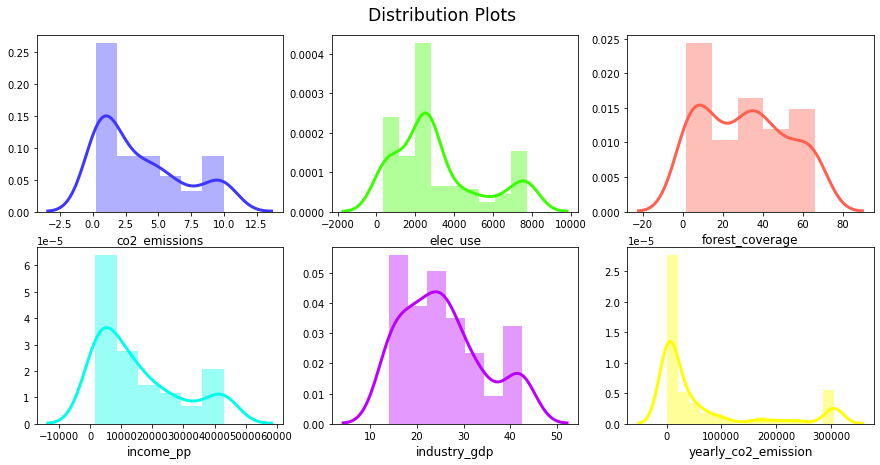

In [452]:
distributionPlot(df ,rows = 2,cols = 3,Title = "Distribution Plots")

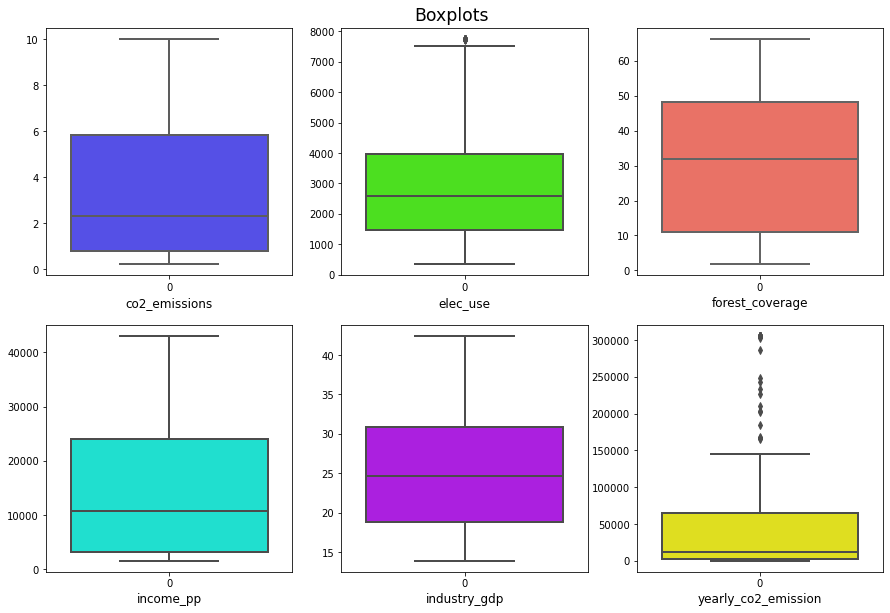

In [453]:
#Plotting Boxplots Plots
boxPlot(df,rows = 2,cols = 3,Title = "Boxplots")

In [454]:
df.describe()

,co2_emissions,elec_use,forest_coverage,income_pp,industry_gdp,yearly_co2_emission
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,3.607596,3118.738624,30.994148,15408.338624,25.515132,63777.167196
std,3.287092,2266.598876,21.375526,13799.018398,8.770000,99805.487346
min,0.219400,346.400000,1.836000,1644.000000,13.900000,433.400000
25%,0.780000,1480.000000,11.000000,3270.000000,18.800000,2350.000000
50%,2.310000,2600.000000,32.000000,10800.000000,24.700000,11600.000000
75%,5.830000,3970.000000,48.100000,24000.000000,30.900000,64600.000000
max,9.988000,7732.000000,66.040000,43000.000000,42.440000,305600.000000


In [455]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

co2_emissions              5.05
elec_use                2490.00
forest_coverage           37.10
income_pp              20730.00
industry_gdp              12.10
yearly_co2_emission    62250.00
dtype: float64


In [456]:
df = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(143, 6)


In [457]:
y = df.pop('co2_emissions')
X = df

In [458]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,0
                                                    test_size = 0.3, random_state=100)

In [459]:
# #Scaling the Features between 0 - 1, for easier and efficient performance by the Model
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
# y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [460]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

In [461]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [467]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(28)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002180,0.003375,0.001001,0.001538,0.0001,{'alpha': 0.0001},-0.868840,-0.811754,-1.267548,-0.872434,...,-0.934904,0.167713,26,-0.879834,-0.879026,-0.777477,-0.850198,-0.881758,-0.853659,0.039834
1,0.003857,0.001749,0.000963,0.000864,0.001,{'alpha': 0.001},-0.868816,-0.811726,-1.267577,-0.872466,...,-0.934898,0.167732,25,-0.879815,-0.878999,-0.777492,-0.850184,-0.881732,-0.853644,0.039819
2,0.004223,0.003560,0.000421,0.000842,0.01,{'alpha': 0.01},-0.868575,-0.811441,-1.267866,-0.872779,...,-0.934836,0.167922,24,-0.879626,-0.878730,-0.777636,-0.850049,-0.881473,-0.853503,0.039671
3,0.000400,0.000799,0.000000,0.000000,0.05,{'alpha': 0.05},-0.867505,-0.810173,-1.269150,-0.874181,...,-0.934563,0.168768,23,-0.878786,-0.877537,-0.778278,-0.849449,-0.880319,-0.852874,0.039011
4,0.001697,0.003394,0.003292,0.006585,0.1,{'alpha': 0.1},-0.866167,-0.808589,-1.270755,-0.875933,...,-0.934221,0.169834,22,-0.877735,-0.876046,-0.779081,-0.848697,-0.878877,-0.852087,0.038186
5,0.006554,0.008036,0.000000,0.000000,0.2,{'alpha': 0.2},-0.863492,-0.805420,-1.273967,-0.879438,...,-0.933538,0.171996,21,-0.875767,-0.873064,-0.780685,-0.847195,-0.875993,-0.850541,0.036558
6,0.003343,0.006180,0.000360,0.000720,0.3,{'alpha': 0.3},-0.860816,-0.802251,-1.278544,-0.882943,...,-0.933128,0.174734,20,-0.874118,-0.870082,-0.782290,-0.846467,-0.873107,-0.849213,0.034966
7,0.003342,0.006179,0.000000,0.000000,0.4,{'alpha': 0.4},-0.858142,-0.799082,-1.283160,-0.886448,...,-0.932726,0.177523,19,-0.872638,-0.867099,-0.783895,-0.846590,-0.870376,-0.848120,0.033418
8,0.004074,0.005875,0.000936,0.001426,0.5,{'alpha': 0.5},-0.855468,-0.795913,-1.286936,-0.889953,...,-0.932156,0.180013,18,-0.871242,-0.864117,-0.785318,-0.847724,-0.867977,-0.847276,0.032017
9,0.002319,0.002115,0.000993,0.001272,0.6,{'alpha': 0.6},-0.852793,-0.792745,-1.284746,-0.891255,...,-0.929952,0.180280,17,-0.870409,-0.861653,-0.785444,-0.848564,-0.866222,-0.846458,0.031376


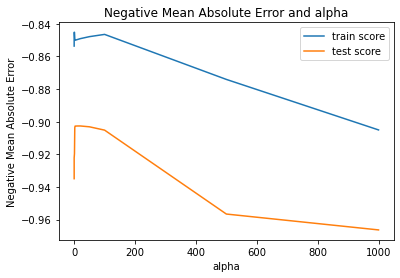

In [468]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [469]:
alpha = 20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [470]:
lasso.coef_

array([ 3.93785762e-04, -0.00000000e+00,  1.42500857e-04,  0.00000000e+00,
        1.85464339e-05])